抽全部 9 小時內的污染源 feature 的一次項 (加 bias)

In [1]:
import csv
import numpy as np
import random
import math

# Extract features
## Read data
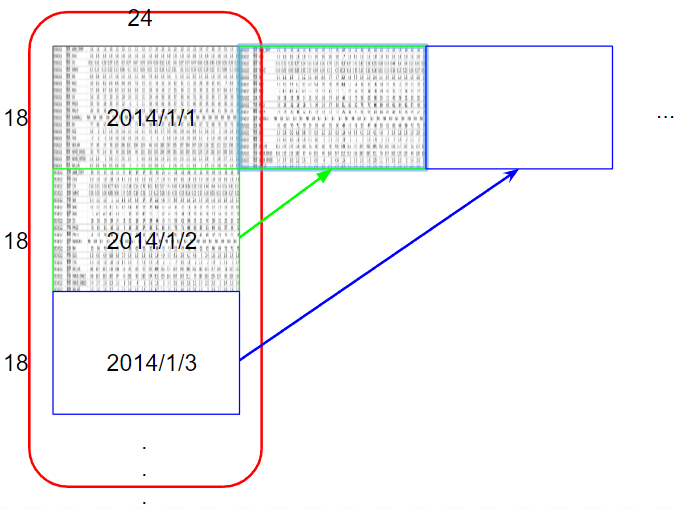

In [2]:
# 宣告一個18維vector (Data)
# 每一個維度儲存一種汙染物的資訊
data = []
for i in range(18):
    data.append([])

# for i_th row in training data
#    Data[i_th row%18].append(every element in i_th row)
#    (可以順便處理rainfall的NR->設成0)
n_row = 0
text = open("data/train.csv", "r", encoding = "big5")
row = csv.reader(text, delimiter = ",")
for r in row:
    # 第0列沒有資訊
    if n_row != 0:
        # 每一列只有第3-26格有值(1天內24小時的數值)
        for i in range(3, 27):
            if r[i] != "NR":
                data[(n_row-1)%18].append(float(r[i]))
            else:
                data[(n_row-1)%18].append(float(0))
    n_row = n_row + 1
text.close()

## 若要連接每次iteration，通常都會先設xxx=0
## 以小廢廢如我來看，上面這段的邏輯真的很值得思考
## 之所以設n_row，是因為要給每row編號，以利進行後面%18的運算

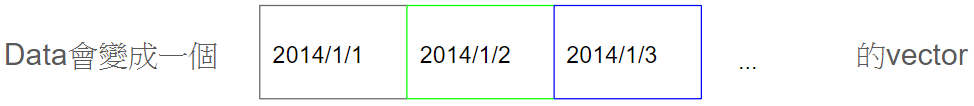

## Parse data to (x, y)
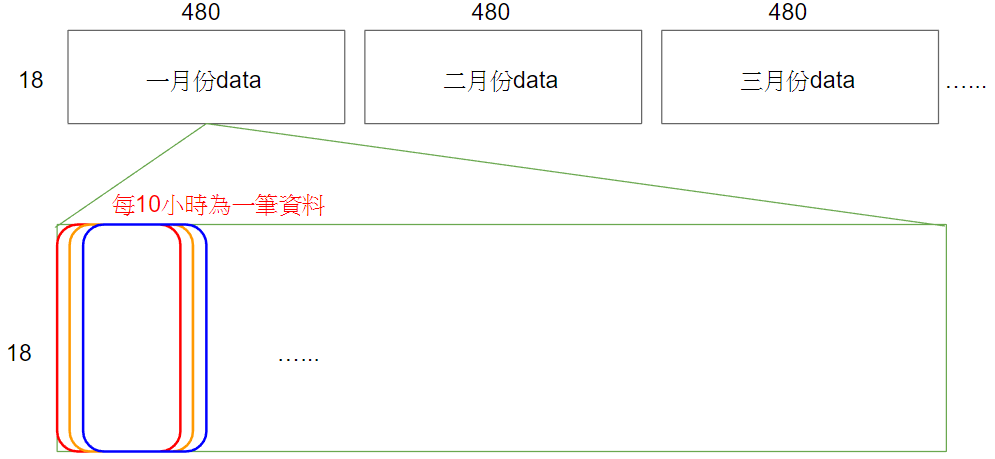

In [3]:
# 宣告train_x儲存前9小時data，以及train_y記錄第十小時pm2.5值
# for i = 1月、2月......
#    取樣每連續10個小時:
#        train_x.append(前9小時所有data)
#        train_y.append(第10小時pm2.5值)
# 在train_x每筆data中加入bias

x = []
y = []
# 每12個月
for i in range(12):
    # 一個月取連續10小時的data可以有471筆
    for j in range(471):
        x.append([])    # 創造 12*471 rows
        # 18種汙染物
        for t in range(18):
            # 連續9小時
            for s in range(9):
                x[471*i+j].append(data[t][480*i+j+s])
        y.append(data[9][480*i+j+9])
x = np.array(x)    # size=(12*471)*(18*9)
y = np.array(y)

# add square term
# x = np.concatenate((x, x**2), axis = 1)

# add bias
# x = np.concatenate((np.ones((x.shape[0], 1)), x), axis = 1)

# 實作 Linear regression
1. Step 1: Define you function set (Model)
2. Step 2: Define you loss function based on training data
3. Step 3: Find the best function

## Initial weight & other hyperparams

In [4]:
w = np.zeros(len(x[0]))
b = np.zeros(len(x))
l_rate = 0.01
iteration = 10000

# check your ans with close form solution to know whether 
# your gradient descent is good
# w = np.matmul(np.matmul(inv(np.matmul(x.transpose(), x)), x.transpose()), y) 

## Start training
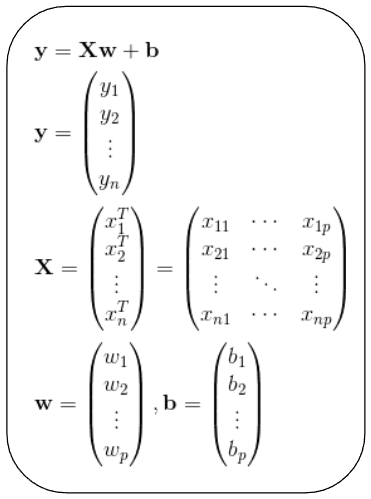

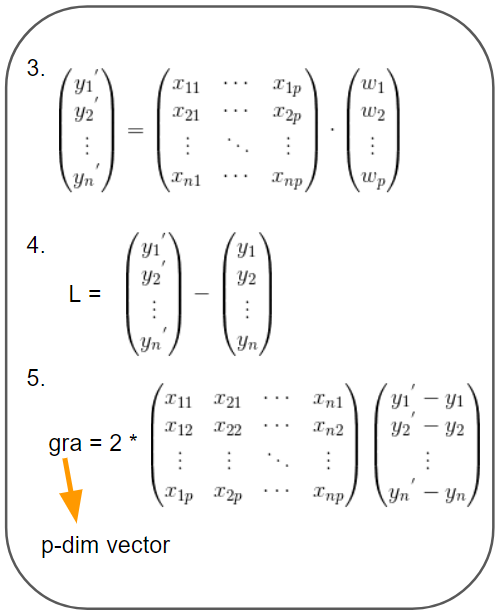

Adagrad
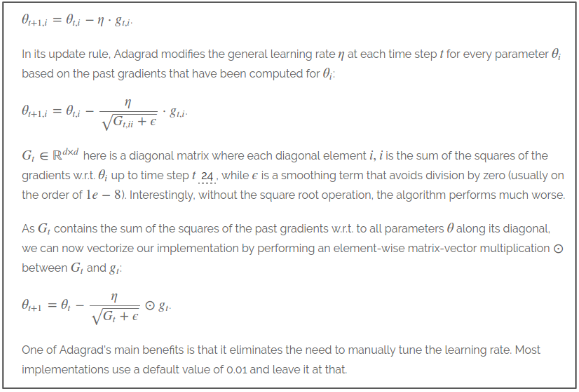

In [5]:
# for i_th iteration:
#     y'= train_x 和 weight vector 的內積
#     L = y' - train_y
#     gra = 2*np.dot((train_x)', L)
#     weitght vector = learning rate * gra

# Adagrad
# 宣告prev_gra儲存每個iteration的gradient
# for i_th iteration:
#     y'= train_x 和 weight vector 的內積
#     L = y' - train_y
#     gra = 2*np.dot((train_x)', L)
#     prev_gra += gra**2
#     ada = np.sqrt(prev_gra)
#     weitght vector -= learning rate * gra/ada

x_t = x.transpose()
w_gra = np.zeros(len(x[0]))
b_gra = np.ones(len(x))

for i in range(iteration):
    hypo = np.dot(x, w) #+ b
    loss = y - hypo
    cost = np.sum(loss**2) / len(x)
    cost_a = np.sqrt(cost)    # root mean square error 作為本次作業的cost
    
    gra_1 = 2.0*-np.dot(x_t, loss)    # 看上面的圖會比較好懂
    gra_2 = 2.0*loss*(-1.0)

    w_gra = w_gra + gra_1**2    # 平方把全部變成正的，以進行下面的開根號
    w_ada = np.sqrt(w_gra)

    b_gra = b_gra + gra_2**2
    b_ada = np.sqrt(b_gra)

    w = w - l_rate * gra_1/w_ada
    b = b - l_rate * gra_2/b_ada
    print('iteration: %d | Cost: %f' % (i, cost_a))
    
    # validation set

iteration: 0 | Cost: 27.071215
iteration: 1 | Cost: 31.763799
iteration: 2 | Cost: 18.504283
iteration: 3 | Cost: 14.911631
iteration: 4 | Cost: 14.213125
iteration: 5 | Cost: 13.917392
iteration: 6 | Cost: 13.680047
iteration: 7 | Cost: 13.461960
iteration: 8 | Cost: 13.257787
iteration: 9 | Cost: 13.066207
iteration: 10 | Cost: 12.886322
iteration: 11 | Cost: 12.717352
iteration: 12 | Cost: 12.558577
iteration: 13 | Cost: 12.409324
iteration: 14 | Cost: 12.268968
iteration: 15 | Cost: 12.136927
iteration: 16 | Cost: 12.012656
iteration: 17 | Cost: 11.895646
iteration: 18 | Cost: 11.785423
iteration: 19 | Cost: 11.681542
iteration: 20 | Cost: 11.583589
iteration: 21 | Cost: 11.491175
iteration: 22 | Cost: 11.403938
iteration: 23 | Cost: 11.321538
iteration: 24 | Cost: 11.243659
iteration: 25 | Cost: 11.170003
iteration: 26 | Cost: 11.100295
iteration: 27 | Cost: 11.034276
iteration: 28 | Cost: 10.971704
iteration: 29 | Cost: 10.912353
iteration: 30 | Cost: 10.856013
iteration: 31 | Co

iteration: 286 | Cost: 8.392269
iteration: 287 | Cost: 8.389021
iteration: 288 | Cost: 8.385785
iteration: 289 | Cost: 8.382563
iteration: 290 | Cost: 8.379354
iteration: 291 | Cost: 8.376157
iteration: 292 | Cost: 8.372973
iteration: 293 | Cost: 8.369802
iteration: 294 | Cost: 8.366643
iteration: 295 | Cost: 8.363497
iteration: 296 | Cost: 8.360363
iteration: 297 | Cost: 8.357241
iteration: 298 | Cost: 8.354132
iteration: 299 | Cost: 8.351034
iteration: 300 | Cost: 8.347949
iteration: 301 | Cost: 8.344875
iteration: 302 | Cost: 8.341813
iteration: 303 | Cost: 8.338764
iteration: 304 | Cost: 8.335725
iteration: 305 | Cost: 8.332699
iteration: 306 | Cost: 8.329683
iteration: 307 | Cost: 8.326680
iteration: 308 | Cost: 8.323687
iteration: 309 | Cost: 8.320706
iteration: 310 | Cost: 8.317736
iteration: 311 | Cost: 8.314778
iteration: 312 | Cost: 8.311830
iteration: 313 | Cost: 8.308893
iteration: 314 | Cost: 8.305967
iteration: 315 | Cost: 8.303052
iteration: 316 | Cost: 8.300148
iteratio

iteration: 551 | Cost: 7.812933
iteration: 552 | Cost: 7.811409
iteration: 553 | Cost: 7.809888
iteration: 554 | Cost: 7.808370
iteration: 555 | Cost: 7.806855
iteration: 556 | Cost: 7.805343
iteration: 557 | Cost: 7.803834
iteration: 558 | Cost: 7.802329
iteration: 559 | Cost: 7.800826
iteration: 560 | Cost: 7.799326
iteration: 561 | Cost: 7.797830
iteration: 562 | Cost: 7.796336
iteration: 563 | Cost: 7.794846
iteration: 564 | Cost: 7.793358
iteration: 565 | Cost: 7.791873
iteration: 566 | Cost: 7.790391
iteration: 567 | Cost: 7.788913
iteration: 568 | Cost: 7.787437
iteration: 569 | Cost: 7.785964
iteration: 570 | Cost: 7.784494
iteration: 571 | Cost: 7.783027
iteration: 572 | Cost: 7.781562
iteration: 573 | Cost: 7.780101
iteration: 574 | Cost: 7.778643
iteration: 575 | Cost: 7.777187
iteration: 576 | Cost: 7.775734
iteration: 577 | Cost: 7.774284
iteration: 578 | Cost: 7.772837
iteration: 579 | Cost: 7.771392
iteration: 580 | Cost: 7.769951
iteration: 581 | Cost: 7.768512
iteratio

iteration: 871 | Cost: 7.437440
iteration: 872 | Cost: 7.436520
iteration: 873 | Cost: 7.435600
iteration: 874 | Cost: 7.434681
iteration: 875 | Cost: 7.433764
iteration: 876 | Cost: 7.432847
iteration: 877 | Cost: 7.431932
iteration: 878 | Cost: 7.431018
iteration: 879 | Cost: 7.430105
iteration: 880 | Cost: 7.429194
iteration: 881 | Cost: 7.428283
iteration: 882 | Cost: 7.427373
iteration: 883 | Cost: 7.426465
iteration: 884 | Cost: 7.425558
iteration: 885 | Cost: 7.424651
iteration: 886 | Cost: 7.423746
iteration: 887 | Cost: 7.422842
iteration: 888 | Cost: 7.421939
iteration: 889 | Cost: 7.421038
iteration: 890 | Cost: 7.420137
iteration: 891 | Cost: 7.419237
iteration: 892 | Cost: 7.418339
iteration: 893 | Cost: 7.417441
iteration: 894 | Cost: 7.416545
iteration: 895 | Cost: 7.415650
iteration: 896 | Cost: 7.414756
iteration: 897 | Cost: 7.413863
iteration: 898 | Cost: 7.412971
iteration: 899 | Cost: 7.412080
iteration: 900 | Cost: 7.411190
iteration: 901 | Cost: 7.410301
iteratio

iteration: 1133 | Cost: 7.228781
iteration: 1134 | Cost: 7.228090
iteration: 1135 | Cost: 7.227399
iteration: 1136 | Cost: 7.226709
iteration: 1137 | Cost: 7.226020
iteration: 1138 | Cost: 7.225331
iteration: 1139 | Cost: 7.224643
iteration: 1140 | Cost: 7.223956
iteration: 1141 | Cost: 7.223269
iteration: 1142 | Cost: 7.222583
iteration: 1143 | Cost: 7.221898
iteration: 1144 | Cost: 7.221213
iteration: 1145 | Cost: 7.220529
iteration: 1146 | Cost: 7.219846
iteration: 1147 | Cost: 7.219163
iteration: 1148 | Cost: 7.218481
iteration: 1149 | Cost: 7.217800
iteration: 1150 | Cost: 7.217119
iteration: 1151 | Cost: 7.216439
iteration: 1152 | Cost: 7.215760
iteration: 1153 | Cost: 7.215081
iteration: 1154 | Cost: 7.214403
iteration: 1155 | Cost: 7.213725
iteration: 1156 | Cost: 7.213049
iteration: 1157 | Cost: 7.212373
iteration: 1158 | Cost: 7.211697
iteration: 1159 | Cost: 7.211022
iteration: 1160 | Cost: 7.210348
iteration: 1161 | Cost: 7.209674
iteration: 1162 | Cost: 7.209001
iteration:

iteration: 1411 | Cost: 7.059012
iteration: 1412 | Cost: 7.058472
iteration: 1413 | Cost: 7.057932
iteration: 1414 | Cost: 7.057393
iteration: 1415 | Cost: 7.056854
iteration: 1416 | Cost: 7.056316
iteration: 1417 | Cost: 7.055778
iteration: 1418 | Cost: 7.055240
iteration: 1419 | Cost: 7.054703
iteration: 1420 | Cost: 7.054166
iteration: 1421 | Cost: 7.053630
iteration: 1422 | Cost: 7.053094
iteration: 1423 | Cost: 7.052559
iteration: 1424 | Cost: 7.052024
iteration: 1425 | Cost: 7.051489
iteration: 1426 | Cost: 7.050955
iteration: 1427 | Cost: 7.050421
iteration: 1428 | Cost: 7.049888
iteration: 1429 | Cost: 7.049355
iteration: 1430 | Cost: 7.048823
iteration: 1431 | Cost: 7.048291
iteration: 1432 | Cost: 7.047759
iteration: 1433 | Cost: 7.047228
iteration: 1434 | Cost: 7.046697
iteration: 1435 | Cost: 7.046167
iteration: 1436 | Cost: 7.045637
iteration: 1437 | Cost: 7.045108
iteration: 1438 | Cost: 7.044579
iteration: 1439 | Cost: 7.044050
iteration: 1440 | Cost: 7.043522
iteration:

iteration: 1696 | Cost: 6.920797
iteration: 1697 | Cost: 6.920362
iteration: 1698 | Cost: 6.919926
iteration: 1699 | Cost: 6.919491
iteration: 1700 | Cost: 6.919057
iteration: 1701 | Cost: 6.918622
iteration: 1702 | Cost: 6.918188
iteration: 1703 | Cost: 6.917754
iteration: 1704 | Cost: 6.917321
iteration: 1705 | Cost: 6.916888
iteration: 1706 | Cost: 6.916455
iteration: 1707 | Cost: 6.916022
iteration: 1708 | Cost: 6.915590
iteration: 1709 | Cost: 6.915158
iteration: 1710 | Cost: 6.914726
iteration: 1711 | Cost: 6.914295
iteration: 1712 | Cost: 6.913864
iteration: 1713 | Cost: 6.913433
iteration: 1714 | Cost: 6.913003
iteration: 1715 | Cost: 6.912573
iteration: 1716 | Cost: 6.912143
iteration: 1717 | Cost: 6.911713
iteration: 1718 | Cost: 6.911284
iteration: 1719 | Cost: 6.910855
iteration: 1720 | Cost: 6.910426
iteration: 1721 | Cost: 6.909998
iteration: 1722 | Cost: 6.909570
iteration: 1723 | Cost: 6.909142
iteration: 1724 | Cost: 6.908714
iteration: 1725 | Cost: 6.908287
iteration:

iteration: 1993 | Cost: 6.803494
iteration: 1994 | Cost: 6.803136
iteration: 1995 | Cost: 6.802778
iteration: 1996 | Cost: 6.802420
iteration: 1997 | Cost: 6.802062
iteration: 1998 | Cost: 6.801705
iteration: 1999 | Cost: 6.801348
iteration: 2000 | Cost: 6.800991
iteration: 2001 | Cost: 6.800634
iteration: 2002 | Cost: 6.800278
iteration: 2003 | Cost: 6.799922
iteration: 2004 | Cost: 6.799566
iteration: 2005 | Cost: 6.799210
iteration: 2006 | Cost: 6.798854
iteration: 2007 | Cost: 6.798499
iteration: 2008 | Cost: 6.798144
iteration: 2009 | Cost: 6.797789
iteration: 2010 | Cost: 6.797434
iteration: 2011 | Cost: 6.797080
iteration: 2012 | Cost: 6.796725
iteration: 2013 | Cost: 6.796371
iteration: 2014 | Cost: 6.796017
iteration: 2015 | Cost: 6.795664
iteration: 2016 | Cost: 6.795310
iteration: 2017 | Cost: 6.794957
iteration: 2018 | Cost: 6.794604
iteration: 2019 | Cost: 6.794252
iteration: 2020 | Cost: 6.793899
iteration: 2021 | Cost: 6.793547
iteration: 2022 | Cost: 6.793195
iteration:

iteration: 2291 | Cost: 6.705653
iteration: 2292 | Cost: 6.705352
iteration: 2293 | Cost: 6.705051
iteration: 2294 | Cost: 6.704751
iteration: 2295 | Cost: 6.704450
iteration: 2296 | Cost: 6.704150
iteration: 2297 | Cost: 6.703850
iteration: 2298 | Cost: 6.703550
iteration: 2299 | Cost: 6.703250
iteration: 2300 | Cost: 6.702950
iteration: 2301 | Cost: 6.702651
iteration: 2302 | Cost: 6.702351
iteration: 2303 | Cost: 6.702052
iteration: 2304 | Cost: 6.701753
iteration: 2305 | Cost: 6.701454
iteration: 2306 | Cost: 6.701156
iteration: 2307 | Cost: 6.700857
iteration: 2308 | Cost: 6.700559
iteration: 2309 | Cost: 6.700261
iteration: 2310 | Cost: 6.699963
iteration: 2311 | Cost: 6.699665
iteration: 2312 | Cost: 6.699367
iteration: 2313 | Cost: 6.699070
iteration: 2314 | Cost: 6.698772
iteration: 2315 | Cost: 6.698475
iteration: 2316 | Cost: 6.698178
iteration: 2317 | Cost: 6.697881
iteration: 2318 | Cost: 6.697585
iteration: 2319 | Cost: 6.697288
iteration: 2320 | Cost: 6.696992
iteration:

iteration: 2590 | Cost: 6.622464
iteration: 2591 | Cost: 6.622207
iteration: 2592 | Cost: 6.621950
iteration: 2593 | Cost: 6.621693
iteration: 2594 | Cost: 6.621436
iteration: 2595 | Cost: 6.621180
iteration: 2596 | Cost: 6.620923
iteration: 2597 | Cost: 6.620667
iteration: 2598 | Cost: 6.620410
iteration: 2599 | Cost: 6.620154
iteration: 2600 | Cost: 6.619898
iteration: 2601 | Cost: 6.619642
iteration: 2602 | Cost: 6.619386
iteration: 2603 | Cost: 6.619131
iteration: 2604 | Cost: 6.618875
iteration: 2605 | Cost: 6.618620
iteration: 2606 | Cost: 6.618365
iteration: 2607 | Cost: 6.618109
iteration: 2608 | Cost: 6.617854
iteration: 2609 | Cost: 6.617600
iteration: 2610 | Cost: 6.617345
iteration: 2611 | Cost: 6.617090
iteration: 2612 | Cost: 6.616836
iteration: 2613 | Cost: 6.616581
iteration: 2614 | Cost: 6.616327
iteration: 2615 | Cost: 6.616073
iteration: 2616 | Cost: 6.615819
iteration: 2617 | Cost: 6.615565
iteration: 2618 | Cost: 6.615311
iteration: 2619 | Cost: 6.615058
iteration:

iteration: 2898 | Cost: 6.548868
iteration: 2899 | Cost: 6.548646
iteration: 2900 | Cost: 6.548425
iteration: 2901 | Cost: 6.548203
iteration: 2902 | Cost: 6.547981
iteration: 2903 | Cost: 6.547760
iteration: 2904 | Cost: 6.547538
iteration: 2905 | Cost: 6.547317
iteration: 2906 | Cost: 6.547095
iteration: 2907 | Cost: 6.546874
iteration: 2908 | Cost: 6.546653
iteration: 2909 | Cost: 6.546432
iteration: 2910 | Cost: 6.546211
iteration: 2911 | Cost: 6.545991
iteration: 2912 | Cost: 6.545770
iteration: 2913 | Cost: 6.545549
iteration: 2914 | Cost: 6.545329
iteration: 2915 | Cost: 6.545109
iteration: 2916 | Cost: 6.544888
iteration: 2917 | Cost: 6.544668
iteration: 2918 | Cost: 6.544448
iteration: 2919 | Cost: 6.544228
iteration: 2920 | Cost: 6.544008
iteration: 2921 | Cost: 6.543788
iteration: 2922 | Cost: 6.543569
iteration: 2923 | Cost: 6.543349
iteration: 2924 | Cost: 6.543130
iteration: 2925 | Cost: 6.542910
iteration: 2926 | Cost: 6.542691
iteration: 2927 | Cost: 6.542472
iteration:

iteration: 3200 | Cost: 6.486126
iteration: 3201 | Cost: 6.485932
iteration: 3202 | Cost: 6.485738
iteration: 3203 | Cost: 6.485543
iteration: 3204 | Cost: 6.485349
iteration: 3205 | Cost: 6.485155
iteration: 3206 | Cost: 6.484961
iteration: 3207 | Cost: 6.484767
iteration: 3208 | Cost: 6.484573
iteration: 3209 | Cost: 6.484380
iteration: 3210 | Cost: 6.484186
iteration: 3211 | Cost: 6.483992
iteration: 3212 | Cost: 6.483799
iteration: 3213 | Cost: 6.483605
iteration: 3214 | Cost: 6.483412
iteration: 3215 | Cost: 6.483219
iteration: 3216 | Cost: 6.483026
iteration: 3217 | Cost: 6.482832
iteration: 3218 | Cost: 6.482639
iteration: 3219 | Cost: 6.482446
iteration: 3220 | Cost: 6.482254
iteration: 3221 | Cost: 6.482061
iteration: 3222 | Cost: 6.481868
iteration: 3223 | Cost: 6.481675
iteration: 3224 | Cost: 6.481483
iteration: 3225 | Cost: 6.481290
iteration: 3226 | Cost: 6.481098
iteration: 3227 | Cost: 6.480906
iteration: 3228 | Cost: 6.480714
iteration: 3229 | Cost: 6.480521
iteration:

iteration: 3492 | Cost: 6.432632
iteration: 3493 | Cost: 6.432460
iteration: 3494 | Cost: 6.432287
iteration: 3495 | Cost: 6.432115
iteration: 3496 | Cost: 6.431942
iteration: 3497 | Cost: 6.431770
iteration: 3498 | Cost: 6.431598
iteration: 3499 | Cost: 6.431425
iteration: 3500 | Cost: 6.431253
iteration: 3501 | Cost: 6.431081
iteration: 3502 | Cost: 6.430909
iteration: 3503 | Cost: 6.430737
iteration: 3504 | Cost: 6.430566
iteration: 3505 | Cost: 6.430394
iteration: 3506 | Cost: 6.430222
iteration: 3507 | Cost: 6.430050
iteration: 3508 | Cost: 6.429879
iteration: 3509 | Cost: 6.429707
iteration: 3510 | Cost: 6.429536
iteration: 3511 | Cost: 6.429365
iteration: 3512 | Cost: 6.429193
iteration: 3513 | Cost: 6.429022
iteration: 3514 | Cost: 6.428851
iteration: 3515 | Cost: 6.428680
iteration: 3516 | Cost: 6.428509
iteration: 3517 | Cost: 6.428338
iteration: 3518 | Cost: 6.428167
iteration: 3519 | Cost: 6.427996
iteration: 3520 | Cost: 6.427825
iteration: 3521 | Cost: 6.427654
iteration:

iteration: 3791 | Cost: 6.383880
iteration: 3792 | Cost: 6.383726
iteration: 3793 | Cost: 6.383572
iteration: 3794 | Cost: 6.383418
iteration: 3795 | Cost: 6.383264
iteration: 3796 | Cost: 6.383110
iteration: 3797 | Cost: 6.382957
iteration: 3798 | Cost: 6.382803
iteration: 3799 | Cost: 6.382649
iteration: 3800 | Cost: 6.382496
iteration: 3801 | Cost: 6.382342
iteration: 3802 | Cost: 6.382189
iteration: 3803 | Cost: 6.382036
iteration: 3804 | Cost: 6.381882
iteration: 3805 | Cost: 6.381729
iteration: 3806 | Cost: 6.381576
iteration: 3807 | Cost: 6.381423
iteration: 3808 | Cost: 6.381269
iteration: 3809 | Cost: 6.381116
iteration: 3810 | Cost: 6.380963
iteration: 3811 | Cost: 6.380811
iteration: 3812 | Cost: 6.380658
iteration: 3813 | Cost: 6.380505
iteration: 3814 | Cost: 6.380352
iteration: 3815 | Cost: 6.380199
iteration: 3816 | Cost: 6.380047
iteration: 3817 | Cost: 6.379894
iteration: 3818 | Cost: 6.379742
iteration: 3819 | Cost: 6.379589
iteration: 3820 | Cost: 6.379437
iteration:

iteration: 4092 | Cost: 6.339954
iteration: 4093 | Cost: 6.339816
iteration: 4094 | Cost: 6.339678
iteration: 4095 | Cost: 6.339540
iteration: 4096 | Cost: 6.339402
iteration: 4097 | Cost: 6.339264
iteration: 4098 | Cost: 6.339126
iteration: 4099 | Cost: 6.338988
iteration: 4100 | Cost: 6.338850
iteration: 4101 | Cost: 6.338712
iteration: 4102 | Cost: 6.338574
iteration: 4103 | Cost: 6.338436
iteration: 4104 | Cost: 6.338299
iteration: 4105 | Cost: 6.338161
iteration: 4106 | Cost: 6.338023
iteration: 4107 | Cost: 6.337886
iteration: 4108 | Cost: 6.337748
iteration: 4109 | Cost: 6.337611
iteration: 4110 | Cost: 6.337473
iteration: 4111 | Cost: 6.337336
iteration: 4112 | Cost: 6.337198
iteration: 4113 | Cost: 6.337061
iteration: 4114 | Cost: 6.336924
iteration: 4115 | Cost: 6.336787
iteration: 4116 | Cost: 6.336650
iteration: 4117 | Cost: 6.336512
iteration: 4118 | Cost: 6.336375
iteration: 4119 | Cost: 6.336238
iteration: 4120 | Cost: 6.336101
iteration: 4121 | Cost: 6.335965
iteration:

iteration: 4401 | Cost: 6.299405
iteration: 4402 | Cost: 6.299281
iteration: 4403 | Cost: 6.299156
iteration: 4404 | Cost: 6.299032
iteration: 4405 | Cost: 6.298907
iteration: 4406 | Cost: 6.298783
iteration: 4407 | Cost: 6.298659
iteration: 4408 | Cost: 6.298535
iteration: 4409 | Cost: 6.298410
iteration: 4410 | Cost: 6.298286
iteration: 4411 | Cost: 6.298162
iteration: 4412 | Cost: 6.298038
iteration: 4413 | Cost: 6.297914
iteration: 4414 | Cost: 6.297790
iteration: 4415 | Cost: 6.297666
iteration: 4416 | Cost: 6.297542
iteration: 4417 | Cost: 6.297418
iteration: 4418 | Cost: 6.297294
iteration: 4419 | Cost: 6.297170
iteration: 4420 | Cost: 6.297046
iteration: 4421 | Cost: 6.296923
iteration: 4422 | Cost: 6.296799
iteration: 4423 | Cost: 6.296675
iteration: 4424 | Cost: 6.296552
iteration: 4425 | Cost: 6.296428
iteration: 4426 | Cost: 6.296304
iteration: 4427 | Cost: 6.296181
iteration: 4428 | Cost: 6.296057
iteration: 4429 | Cost: 6.295934
iteration: 4430 | Cost: 6.295811
iteration:

iteration: 4693 | Cost: 6.264705
iteration: 4694 | Cost: 6.264591
iteration: 4695 | Cost: 6.264478
iteration: 4696 | Cost: 6.264365
iteration: 4697 | Cost: 6.264251
iteration: 4698 | Cost: 6.264138
iteration: 4699 | Cost: 6.264025
iteration: 4700 | Cost: 6.263912
iteration: 4701 | Cost: 6.263799
iteration: 4702 | Cost: 6.263686
iteration: 4703 | Cost: 6.263572
iteration: 4704 | Cost: 6.263459
iteration: 4705 | Cost: 6.263346
iteration: 4706 | Cost: 6.263234
iteration: 4707 | Cost: 6.263121
iteration: 4708 | Cost: 6.263008
iteration: 4709 | Cost: 6.262895
iteration: 4710 | Cost: 6.262782
iteration: 4711 | Cost: 6.262669
iteration: 4712 | Cost: 6.262557
iteration: 4713 | Cost: 6.262444
iteration: 4714 | Cost: 6.262331
iteration: 4715 | Cost: 6.262219
iteration: 4716 | Cost: 6.262106
iteration: 4717 | Cost: 6.261993
iteration: 4718 | Cost: 6.261881
iteration: 4719 | Cost: 6.261768
iteration: 4720 | Cost: 6.261656
iteration: 4721 | Cost: 6.261543
iteration: 4722 | Cost: 6.261431
iteration:

iteration: 4994 | Cost: 6.232110
iteration: 4995 | Cost: 6.232007
iteration: 4996 | Cost: 6.231904
iteration: 4997 | Cost: 6.231800
iteration: 4998 | Cost: 6.231697
iteration: 4999 | Cost: 6.231594
iteration: 5000 | Cost: 6.231491
iteration: 5001 | Cost: 6.231387
iteration: 5002 | Cost: 6.231284
iteration: 5003 | Cost: 6.231181
iteration: 5004 | Cost: 6.231078
iteration: 5005 | Cost: 6.230975
iteration: 5006 | Cost: 6.230872
iteration: 5007 | Cost: 6.230769
iteration: 5008 | Cost: 6.230666
iteration: 5009 | Cost: 6.230563
iteration: 5010 | Cost: 6.230460
iteration: 5011 | Cost: 6.230357
iteration: 5012 | Cost: 6.230254
iteration: 5013 | Cost: 6.230151
iteration: 5014 | Cost: 6.230049
iteration: 5015 | Cost: 6.229946
iteration: 5016 | Cost: 6.229843
iteration: 5017 | Cost: 6.229740
iteration: 5018 | Cost: 6.229638
iteration: 5019 | Cost: 6.229535
iteration: 5020 | Cost: 6.229432
iteration: 5021 | Cost: 6.229330
iteration: 5022 | Cost: 6.229227
iteration: 5023 | Cost: 6.229125
iteration:

iteration: 5300 | Cost: 6.201853
iteration: 5301 | Cost: 6.201759
iteration: 5302 | Cost: 6.201664
iteration: 5303 | Cost: 6.201570
iteration: 5304 | Cost: 6.201475
iteration: 5305 | Cost: 6.201381
iteration: 5306 | Cost: 6.201287
iteration: 5307 | Cost: 6.201192
iteration: 5308 | Cost: 6.201098
iteration: 5309 | Cost: 6.201003
iteration: 5310 | Cost: 6.200909
iteration: 5311 | Cost: 6.200815
iteration: 5312 | Cost: 6.200721
iteration: 5313 | Cost: 6.200626
iteration: 5314 | Cost: 6.200532
iteration: 5315 | Cost: 6.200438
iteration: 5316 | Cost: 6.200344
iteration: 5317 | Cost: 6.200250
iteration: 5318 | Cost: 6.200156
iteration: 5319 | Cost: 6.200062
iteration: 5320 | Cost: 6.199968
iteration: 5321 | Cost: 6.199874
iteration: 5322 | Cost: 6.199780
iteration: 5323 | Cost: 6.199686
iteration: 5324 | Cost: 6.199592
iteration: 5325 | Cost: 6.199498
iteration: 5326 | Cost: 6.199404
iteration: 5327 | Cost: 6.199310
iteration: 5328 | Cost: 6.199217
iteration: 5329 | Cost: 6.199123
iteration:

iteration: 5597 | Cost: 6.174919
iteration: 5598 | Cost: 6.174832
iteration: 5599 | Cost: 6.174745
iteration: 5600 | Cost: 6.174658
iteration: 5601 | Cost: 6.174571
iteration: 5602 | Cost: 6.174484
iteration: 5603 | Cost: 6.174397
iteration: 5604 | Cost: 6.174310
iteration: 5605 | Cost: 6.174223
iteration: 5606 | Cost: 6.174137
iteration: 5607 | Cost: 6.174050
iteration: 5608 | Cost: 6.173963
iteration: 5609 | Cost: 6.173876
iteration: 5610 | Cost: 6.173790
iteration: 5611 | Cost: 6.173703
iteration: 5612 | Cost: 6.173616
iteration: 5613 | Cost: 6.173530
iteration: 5614 | Cost: 6.173443
iteration: 5615 | Cost: 6.173357
iteration: 5616 | Cost: 6.173270
iteration: 5617 | Cost: 6.173184
iteration: 5618 | Cost: 6.173097
iteration: 5619 | Cost: 6.173011
iteration: 5620 | Cost: 6.172924
iteration: 5621 | Cost: 6.172838
iteration: 5622 | Cost: 6.172751
iteration: 5623 | Cost: 6.172665
iteration: 5624 | Cost: 6.172579
iteration: 5625 | Cost: 6.172492
iteration: 5626 | Cost: 6.172406
iteration:

iteration: 5883 | Cost: 6.150983
iteration: 5884 | Cost: 6.150903
iteration: 5885 | Cost: 6.150822
iteration: 5886 | Cost: 6.150742
iteration: 5887 | Cost: 6.150661
iteration: 5888 | Cost: 6.150581
iteration: 5889 | Cost: 6.150500
iteration: 5890 | Cost: 6.150420
iteration: 5891 | Cost: 6.150340
iteration: 5892 | Cost: 6.150259
iteration: 5893 | Cost: 6.150179
iteration: 5894 | Cost: 6.150099
iteration: 5895 | Cost: 6.150018
iteration: 5896 | Cost: 6.149938
iteration: 5897 | Cost: 6.149858
iteration: 5898 | Cost: 6.149778
iteration: 5899 | Cost: 6.149698
iteration: 5900 | Cost: 6.149617
iteration: 5901 | Cost: 6.149537
iteration: 5902 | Cost: 6.149457
iteration: 5903 | Cost: 6.149377
iteration: 5904 | Cost: 6.149297
iteration: 5905 | Cost: 6.149217
iteration: 5906 | Cost: 6.149137
iteration: 5907 | Cost: 6.149057
iteration: 5908 | Cost: 6.148977
iteration: 5909 | Cost: 6.148897
iteration: 5910 | Cost: 6.148817
iteration: 5911 | Cost: 6.148737
iteration: 5912 | Cost: 6.148657
iteration:

iteration: 6178 | Cost: 6.128126
iteration: 6179 | Cost: 6.128052
iteration: 6180 | Cost: 6.127977
iteration: 6181 | Cost: 6.127902
iteration: 6182 | Cost: 6.127828
iteration: 6183 | Cost: 6.127754
iteration: 6184 | Cost: 6.127679
iteration: 6185 | Cost: 6.127605
iteration: 6186 | Cost: 6.127530
iteration: 6187 | Cost: 6.127456
iteration: 6188 | Cost: 6.127381
iteration: 6189 | Cost: 6.127307
iteration: 6190 | Cost: 6.127233
iteration: 6191 | Cost: 6.127158
iteration: 6192 | Cost: 6.127084
iteration: 6193 | Cost: 6.127010
iteration: 6194 | Cost: 6.126936
iteration: 6195 | Cost: 6.126861
iteration: 6196 | Cost: 6.126787
iteration: 6197 | Cost: 6.126713
iteration: 6198 | Cost: 6.126639
iteration: 6199 | Cost: 6.126565
iteration: 6200 | Cost: 6.126490
iteration: 6201 | Cost: 6.126416
iteration: 6202 | Cost: 6.126342
iteration: 6203 | Cost: 6.126268
iteration: 6204 | Cost: 6.126194
iteration: 6205 | Cost: 6.126120
iteration: 6206 | Cost: 6.126046
iteration: 6207 | Cost: 6.125972
iteration:

iteration: 6472 | Cost: 6.107003
iteration: 6473 | Cost: 6.106933
iteration: 6474 | Cost: 6.106864
iteration: 6475 | Cost: 6.106795
iteration: 6476 | Cost: 6.106726
iteration: 6477 | Cost: 6.106657
iteration: 6478 | Cost: 6.106588
iteration: 6479 | Cost: 6.106518
iteration: 6480 | Cost: 6.106449
iteration: 6481 | Cost: 6.106380
iteration: 6482 | Cost: 6.106311
iteration: 6483 | Cost: 6.106242
iteration: 6484 | Cost: 6.106173
iteration: 6485 | Cost: 6.106104
iteration: 6486 | Cost: 6.106035
iteration: 6487 | Cost: 6.105966
iteration: 6488 | Cost: 6.105897
iteration: 6489 | Cost: 6.105828
iteration: 6490 | Cost: 6.105759
iteration: 6491 | Cost: 6.105690
iteration: 6492 | Cost: 6.105621
iteration: 6493 | Cost: 6.105552
iteration: 6494 | Cost: 6.105484
iteration: 6495 | Cost: 6.105415
iteration: 6496 | Cost: 6.105346
iteration: 6497 | Cost: 6.105277
iteration: 6498 | Cost: 6.105208
iteration: 6499 | Cost: 6.105140
iteration: 6500 | Cost: 6.105071
iteration: 6501 | Cost: 6.105002
iteration:

iteration: 6774 | Cost: 6.086849
iteration: 6775 | Cost: 6.086784
iteration: 6776 | Cost: 6.086720
iteration: 6777 | Cost: 6.086656
iteration: 6778 | Cost: 6.086591
iteration: 6779 | Cost: 6.086527
iteration: 6780 | Cost: 6.086463
iteration: 6781 | Cost: 6.086399
iteration: 6782 | Cost: 6.086335
iteration: 6783 | Cost: 6.086270
iteration: 6784 | Cost: 6.086206
iteration: 6785 | Cost: 6.086142
iteration: 6786 | Cost: 6.086078
iteration: 6787 | Cost: 6.086014
iteration: 6788 | Cost: 6.085950
iteration: 6789 | Cost: 6.085886
iteration: 6790 | Cost: 6.085821
iteration: 6791 | Cost: 6.085757
iteration: 6792 | Cost: 6.085693
iteration: 6793 | Cost: 6.085629
iteration: 6794 | Cost: 6.085565
iteration: 6795 | Cost: 6.085501
iteration: 6796 | Cost: 6.085437
iteration: 6797 | Cost: 6.085373
iteration: 6798 | Cost: 6.085309
iteration: 6799 | Cost: 6.085245
iteration: 6800 | Cost: 6.085181
iteration: 6801 | Cost: 6.085118
iteration: 6802 | Cost: 6.085054
iteration: 6803 | Cost: 6.084990
iteration:

iteration: 7057 | Cost: 6.069244
iteration: 7058 | Cost: 6.069184
iteration: 7059 | Cost: 6.069123
iteration: 7060 | Cost: 6.069063
iteration: 7061 | Cost: 6.069003
iteration: 7062 | Cost: 6.068943
iteration: 7063 | Cost: 6.068883
iteration: 7064 | Cost: 6.068823
iteration: 7065 | Cost: 6.068763
iteration: 7066 | Cost: 6.068703
iteration: 7067 | Cost: 6.068643
iteration: 7068 | Cost: 6.068583
iteration: 7069 | Cost: 6.068523
iteration: 7070 | Cost: 6.068463
iteration: 7071 | Cost: 6.068403
iteration: 7072 | Cost: 6.068343
iteration: 7073 | Cost: 6.068283
iteration: 7074 | Cost: 6.068223
iteration: 7075 | Cost: 6.068163
iteration: 7076 | Cost: 6.068103
iteration: 7077 | Cost: 6.068043
iteration: 7078 | Cost: 6.067983
iteration: 7079 | Cost: 6.067924
iteration: 7080 | Cost: 6.067864
iteration: 7081 | Cost: 6.067804
iteration: 7082 | Cost: 6.067744
iteration: 7083 | Cost: 6.067684
iteration: 7084 | Cost: 6.067625
iteration: 7085 | Cost: 6.067565
iteration: 7086 | Cost: 6.067505
iteration:

iteration: 7354 | Cost: 6.051974
iteration: 7355 | Cost: 6.051918
iteration: 7356 | Cost: 6.051862
iteration: 7357 | Cost: 6.051806
iteration: 7358 | Cost: 6.051750
iteration: 7359 | Cost: 6.051694
iteration: 7360 | Cost: 6.051637
iteration: 7361 | Cost: 6.051581
iteration: 7362 | Cost: 6.051525
iteration: 7363 | Cost: 6.051469
iteration: 7364 | Cost: 6.051413
iteration: 7365 | Cost: 6.051357
iteration: 7366 | Cost: 6.051301
iteration: 7367 | Cost: 6.051245
iteration: 7368 | Cost: 6.051189
iteration: 7369 | Cost: 6.051133
iteration: 7370 | Cost: 6.051077
iteration: 7371 | Cost: 6.051021
iteration: 7372 | Cost: 6.050965
iteration: 7373 | Cost: 6.050909
iteration: 7374 | Cost: 6.050853
iteration: 7375 | Cost: 6.050797
iteration: 7376 | Cost: 6.050741
iteration: 7377 | Cost: 6.050685
iteration: 7378 | Cost: 6.050629
iteration: 7379 | Cost: 6.050573
iteration: 7380 | Cost: 6.050518
iteration: 7381 | Cost: 6.050462
iteration: 7382 | Cost: 6.050406
iteration: 7383 | Cost: 6.050350
iteration:

iteration: 7657 | Cost: 6.035512
iteration: 7658 | Cost: 6.035460
iteration: 7659 | Cost: 6.035407
iteration: 7660 | Cost: 6.035355
iteration: 7661 | Cost: 6.035302
iteration: 7662 | Cost: 6.035250
iteration: 7663 | Cost: 6.035197
iteration: 7664 | Cost: 6.035145
iteration: 7665 | Cost: 6.035093
iteration: 7666 | Cost: 6.035040
iteration: 7667 | Cost: 6.034988
iteration: 7668 | Cost: 6.034935
iteration: 7669 | Cost: 6.034883
iteration: 7670 | Cost: 6.034831
iteration: 7671 | Cost: 6.034778
iteration: 7672 | Cost: 6.034726
iteration: 7673 | Cost: 6.034673
iteration: 7674 | Cost: 6.034621
iteration: 7675 | Cost: 6.034569
iteration: 7676 | Cost: 6.034517
iteration: 7677 | Cost: 6.034464
iteration: 7678 | Cost: 6.034412
iteration: 7679 | Cost: 6.034360
iteration: 7680 | Cost: 6.034307
iteration: 7681 | Cost: 6.034255
iteration: 7682 | Cost: 6.034203
iteration: 7683 | Cost: 6.034151
iteration: 7684 | Cost: 6.034098
iteration: 7685 | Cost: 6.034046
iteration: 7686 | Cost: 6.033994
iteration:

iteration: 7953 | Cost: 6.020456
iteration: 7954 | Cost: 6.020407
iteration: 7955 | Cost: 6.020358
iteration: 7956 | Cost: 6.020309
iteration: 7957 | Cost: 6.020259
iteration: 7958 | Cost: 6.020210
iteration: 7959 | Cost: 6.020161
iteration: 7960 | Cost: 6.020112
iteration: 7961 | Cost: 6.020063
iteration: 7962 | Cost: 6.020013
iteration: 7963 | Cost: 6.019964
iteration: 7964 | Cost: 6.019915
iteration: 7965 | Cost: 6.019866
iteration: 7966 | Cost: 6.019817
iteration: 7967 | Cost: 6.019768
iteration: 7968 | Cost: 6.019719
iteration: 7969 | Cost: 6.019670
iteration: 7970 | Cost: 6.019621
iteration: 7971 | Cost: 6.019571
iteration: 7972 | Cost: 6.019522
iteration: 7973 | Cost: 6.019473
iteration: 7974 | Cost: 6.019424
iteration: 7975 | Cost: 6.019375
iteration: 7976 | Cost: 6.019326
iteration: 7977 | Cost: 6.019277
iteration: 7978 | Cost: 6.019228
iteration: 7979 | Cost: 6.019179
iteration: 7980 | Cost: 6.019130
iteration: 7981 | Cost: 6.019081
iteration: 7982 | Cost: 6.019032
iteration:

iteration: 8242 | Cost: 6.006649
iteration: 8243 | Cost: 6.006603
iteration: 8244 | Cost: 6.006557
iteration: 8245 | Cost: 6.006510
iteration: 8246 | Cost: 6.006464
iteration: 8247 | Cost: 6.006418
iteration: 8248 | Cost: 6.006371
iteration: 8249 | Cost: 6.006325
iteration: 8250 | Cost: 6.006279
iteration: 8251 | Cost: 6.006233
iteration: 8252 | Cost: 6.006186
iteration: 8253 | Cost: 6.006140
iteration: 8254 | Cost: 6.006094
iteration: 8255 | Cost: 6.006048
iteration: 8256 | Cost: 6.006002
iteration: 8257 | Cost: 6.005955
iteration: 8258 | Cost: 6.005909
iteration: 8259 | Cost: 6.005863
iteration: 8260 | Cost: 6.005817
iteration: 8261 | Cost: 6.005771
iteration: 8262 | Cost: 6.005725
iteration: 8263 | Cost: 6.005678
iteration: 8264 | Cost: 6.005632
iteration: 8265 | Cost: 6.005586
iteration: 8266 | Cost: 6.005540
iteration: 8267 | Cost: 6.005494
iteration: 8268 | Cost: 6.005448
iteration: 8269 | Cost: 6.005402
iteration: 8270 | Cost: 6.005356
iteration: 8271 | Cost: 6.005310
iteration:

iteration: 8534 | Cost: 5.993520
iteration: 8535 | Cost: 5.993477
iteration: 8536 | Cost: 5.993433
iteration: 8537 | Cost: 5.993389
iteration: 8538 | Cost: 5.993346
iteration: 8539 | Cost: 5.993302
iteration: 8540 | Cost: 5.993259
iteration: 8541 | Cost: 5.993215
iteration: 8542 | Cost: 5.993172
iteration: 8543 | Cost: 5.993128
iteration: 8544 | Cost: 5.993084
iteration: 8545 | Cost: 5.993041
iteration: 8546 | Cost: 5.992997
iteration: 8547 | Cost: 5.992954
iteration: 8548 | Cost: 5.992910
iteration: 8549 | Cost: 5.992867
iteration: 8550 | Cost: 5.992823
iteration: 8551 | Cost: 5.992780
iteration: 8552 | Cost: 5.992736
iteration: 8553 | Cost: 5.992693
iteration: 8554 | Cost: 5.992649
iteration: 8555 | Cost: 5.992606
iteration: 8556 | Cost: 5.992563
iteration: 8557 | Cost: 5.992519
iteration: 8558 | Cost: 5.992476
iteration: 8559 | Cost: 5.992432
iteration: 8560 | Cost: 5.992389
iteration: 8561 | Cost: 5.992346
iteration: 8562 | Cost: 5.992302
iteration: 8563 | Cost: 5.992259
iteration:

iteration: 8820 | Cost: 5.981397
iteration: 8821 | Cost: 5.981356
iteration: 8822 | Cost: 5.981315
iteration: 8823 | Cost: 5.981273
iteration: 8824 | Cost: 5.981232
iteration: 8825 | Cost: 5.981191
iteration: 8826 | Cost: 5.981150
iteration: 8827 | Cost: 5.981109
iteration: 8828 | Cost: 5.981068
iteration: 8829 | Cost: 5.981027
iteration: 8830 | Cost: 5.980986
iteration: 8831 | Cost: 5.980944
iteration: 8832 | Cost: 5.980903
iteration: 8833 | Cost: 5.980862
iteration: 8834 | Cost: 5.980821
iteration: 8835 | Cost: 5.980780
iteration: 8836 | Cost: 5.980739
iteration: 8837 | Cost: 5.980698
iteration: 8838 | Cost: 5.980657
iteration: 8839 | Cost: 5.980616
iteration: 8840 | Cost: 5.980575
iteration: 8841 | Cost: 5.980534
iteration: 8842 | Cost: 5.980493
iteration: 8843 | Cost: 5.980452
iteration: 8844 | Cost: 5.980411
iteration: 8845 | Cost: 5.980370
iteration: 8846 | Cost: 5.980329
iteration: 8847 | Cost: 5.980288
iteration: 8848 | Cost: 5.980247
iteration: 8849 | Cost: 5.980206
iteration:

iteration: 9098 | Cost: 5.970257
iteration: 9099 | Cost: 5.970218
iteration: 9100 | Cost: 5.970179
iteration: 9101 | Cost: 5.970140
iteration: 9102 | Cost: 5.970101
iteration: 9103 | Cost: 5.970062
iteration: 9104 | Cost: 5.970023
iteration: 9105 | Cost: 5.969984
iteration: 9106 | Cost: 5.969945
iteration: 9107 | Cost: 5.969906
iteration: 9108 | Cost: 5.969867
iteration: 9109 | Cost: 5.969829
iteration: 9110 | Cost: 5.969790
iteration: 9111 | Cost: 5.969751
iteration: 9112 | Cost: 5.969712
iteration: 9113 | Cost: 5.969673
iteration: 9114 | Cost: 5.969634
iteration: 9115 | Cost: 5.969595
iteration: 9116 | Cost: 5.969556
iteration: 9117 | Cost: 5.969518
iteration: 9118 | Cost: 5.969479
iteration: 9119 | Cost: 5.969440
iteration: 9120 | Cost: 5.969401
iteration: 9121 | Cost: 5.969362
iteration: 9122 | Cost: 5.969323
iteration: 9123 | Cost: 5.969285
iteration: 9124 | Cost: 5.969246
iteration: 9125 | Cost: 5.969207
iteration: 9126 | Cost: 5.969168
iteration: 9127 | Cost: 5.969130
iteration:

iteration: 9381 | Cost: 5.959520
iteration: 9382 | Cost: 5.959483
iteration: 9383 | Cost: 5.959446
iteration: 9384 | Cost: 5.959410
iteration: 9385 | Cost: 5.959373
iteration: 9386 | Cost: 5.959336
iteration: 9387 | Cost: 5.959299
iteration: 9388 | Cost: 5.959262
iteration: 9389 | Cost: 5.959225
iteration: 9390 | Cost: 5.959188
iteration: 9391 | Cost: 5.959151
iteration: 9392 | Cost: 5.959115
iteration: 9393 | Cost: 5.959078
iteration: 9394 | Cost: 5.959041
iteration: 9395 | Cost: 5.959004
iteration: 9396 | Cost: 5.958967
iteration: 9397 | Cost: 5.958931
iteration: 9398 | Cost: 5.958894
iteration: 9399 | Cost: 5.958857
iteration: 9400 | Cost: 5.958820
iteration: 9401 | Cost: 5.958783
iteration: 9402 | Cost: 5.958747
iteration: 9403 | Cost: 5.958710
iteration: 9404 | Cost: 5.958673
iteration: 9405 | Cost: 5.958636
iteration: 9406 | Cost: 5.958600
iteration: 9407 | Cost: 5.958563
iteration: 9408 | Cost: 5.958526
iteration: 9409 | Cost: 5.958489
iteration: 9410 | Cost: 5.958453
iteration:

iteration: 9674 | Cost: 5.948999
iteration: 9675 | Cost: 5.948964
iteration: 9676 | Cost: 5.948929
iteration: 9677 | Cost: 5.948894
iteration: 9678 | Cost: 5.948859
iteration: 9679 | Cost: 5.948824
iteration: 9680 | Cost: 5.948789
iteration: 9681 | Cost: 5.948755
iteration: 9682 | Cost: 5.948720
iteration: 9683 | Cost: 5.948685
iteration: 9684 | Cost: 5.948650
iteration: 9685 | Cost: 5.948615
iteration: 9686 | Cost: 5.948580
iteration: 9687 | Cost: 5.948545
iteration: 9688 | Cost: 5.948511
iteration: 9689 | Cost: 5.948476
iteration: 9690 | Cost: 5.948441
iteration: 9691 | Cost: 5.948406
iteration: 9692 | Cost: 5.948371
iteration: 9693 | Cost: 5.948336
iteration: 9694 | Cost: 5.948302
iteration: 9695 | Cost: 5.948267
iteration: 9696 | Cost: 5.948232
iteration: 9697 | Cost: 5.948197
iteration: 9698 | Cost: 5.948163
iteration: 9699 | Cost: 5.948128
iteration: 9700 | Cost: 5.948093
iteration: 9701 | Cost: 5.948058
iteration: 9702 | Cost: 5.948024
iteration: 9703 | Cost: 5.947989
iteration:

iteration: 9974 | Cost: 5.938807
iteration: 9975 | Cost: 5.938774
iteration: 9976 | Cost: 5.938741
iteration: 9977 | Cost: 5.938708
iteration: 9978 | Cost: 5.938675
iteration: 9979 | Cost: 5.938642
iteration: 9980 | Cost: 5.938609
iteration: 9981 | Cost: 5.938576
iteration: 9982 | Cost: 5.938543
iteration: 9983 | Cost: 5.938510
iteration: 9984 | Cost: 5.938477
iteration: 9985 | Cost: 5.938444
iteration: 9986 | Cost: 5.938411
iteration: 9987 | Cost: 5.938378
iteration: 9988 | Cost: 5.938345
iteration: 9989 | Cost: 5.938312
iteration: 9990 | Cost: 5.938279
iteration: 9991 | Cost: 5.938246
iteration: 9992 | Cost: 5.938213
iteration: 9993 | Cost: 5.938181
iteration: 9994 | Cost: 5.938148
iteration: 9995 | Cost: 5.938115
iteration: 9996 | Cost: 5.938082
iteration: 9997 | Cost: 5.938049
iteration: 9998 | Cost: 5.938016
iteration: 9999 | Cost: 5.937983
